In [1]:
# coding=utf-8
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('03_FINAL_sentiment.csv')
df

,name,category,city,latitude,longitude,price_level,rating,review_count,delivery,pickup,...,NRC_surprise,NRC_anticipation,NRC_sadness,NRC_negative,NRC_trust,NRC_anger,NRC_joy,NRC_disgust,NRC_fear,NRC_pos_neg
0,Upstate,"['Seafood', 'Wine Bars', 'Beer Bar']",New York,40.726314,-73.986490,2,4.5,1699,0,0,...,0.009665,0.023578,0.004186,0.014713,0.026902,0.004063,0.028318,0.004001,0.002586,0.030288
1,Amélie,"['French', 'Wine Bars']",New York,40.732700,-73.997660,2,4.5,2428,0,0,...,0.008764,0.023867,0.005086,0.012990,0.028797,0.004147,0.029267,0.003208,0.003365,0.033884
2,Uglyduckling,"['American (Traditional)', 'Gastropubs']",New York,40.686023,-73.991302,2,4.0,432,1,1,...,0.009389,0.019532,0.007209,0.016766,0.023388,0.006874,0.023221,0.004443,0.010898,0.020957
3,Aunt Jake's,"['Italian', 'Wine Bars', 'Pasta Shops']",New York,40.719031,-73.997716,2,4.0,1143,1,1,...,0.008413,0.021799,0.004912,0.011667,0.026159,0.004176,0.023948,0.003193,0.005711,0.028677
4,LoveMama,"['Thai', 'Malaysian', 'Vietnamese']",New York,40.730386,-73.986061,2,4.0,4136,1,1,...,0.010379,0.021150,0.002937,0.011750,0.029864,0.004504,0.027416,0.003035,0.004896,0.034172
5,Joe's Shanghai,"['Shanghainese', 'Seafood']",New York,40.714669,-73.997760,2,4.0,5686,0,0,...,0.007930,0.021991,0.004265,0.015460,0.023657,0.005598,0.019925,0.003732,0.005664,0.033053
6,Jacob's Pickles,"['Comfort Food', 'Southern', 'American (Tradit...",New York,40.786650,-73.975528,2,4.0,3632,0,0,...,0.007530,0.021959,0.004829,0.013739,0.024201,0.005289,0.023166,0.003392,0.011784,0.025811
7,Boucherie West Village,"['French', 'Cocktail Bars', 'Steakhouses']",New York,40.733063,-74.002877,3,4.5,989,1,1,...,0.010691,0.022549,0.005135,0.010364,0.028711,0.003735,0.029132,0.003455,0.003641,0.040149
8,Burger & Lobster,"['Seafood', 'Burgers', 'American (New)']",New York,40.740070,-73.993440,2,4.0,5002,1,1,...,0.008226,0.020808,0.005404,0.012824,0.025405,0.003710,0.025002,0.003226,0.002662,0.029760
9,Root & Bone,"['Southern', 'Comfort Food', 'Desserts']",New York,40.722720,-73.983340,2,4.0,1474,1,1,...,0.008924,0.020538,0.005971,0.014304,0.026312,0.005446,0.025131,0.005052,0.011155,0.027625


# Load data

In [4]:
df.drop_duplicates(subset = ['url'], keep = 'first', inplace = True)

In [5]:
df = df.reset_index(drop = True)
df.head(2)

,name,category,city,latitude,longitude,price_level,rating,review_count,delivery,pickup,...,NRC_surprise,NRC_anticipation,NRC_sadness,NRC_negative,NRC_trust,NRC_anger,NRC_joy,NRC_disgust,NRC_fear,NRC_pos_neg
0,Upstate,"['Seafood', 'Wine Bars', 'Beer Bar']",New York,40.726314,-73.98649,2,4.5,1699,0,0,...,0.009665,0.023578,0.004186,0.014713,0.026902,0.004063,0.028318,0.004001,0.002586,0.030288
1,Amélie,"['French', 'Wine Bars']",New York,40.732700,-73.99766,2,4.5,2428,0,0,...,0.008764,0.023867,0.005086,0.012990,0.028797,0.004147,0.029267,0.003208,0.003365,0.033884


# Classification

In [6]:
del df['category']

In [7]:
import ast
def get_cat_list(cat_string):
    cat_list = []
    for cat_dict in ast.literal_eval(cat_string):   
        cat_list.append(cat_dict['title'])
    return cat_list


df['category'] = df['categories'].apply(get_cat_list)


In [8]:
for i in df['category'][0]:
    print(i)

Seafood
Wine Bars
Beer Bar


In [9]:
category_list = []
for i in range(len(df.index)) :
    for j in df['category'][i]:
        if j not in category_list:
            category_list.append(j)
            
category_list


['Seafood',
 'Wine Bars',
 'Beer Bar',
 'French',
 'American (Traditional)',
 'Gastropubs',
 'Italian',
 'Pasta Shops',
 'Thai',
 'Malaysian',
 'Vietnamese',
 'Shanghainese',
 'Comfort Food',
 'Southern',
 'Cocktail Bars',
 'Steakhouses',
 'Burgers',
 'American (New)',
 'Desserts',
 'Pizza',
 'Korean',
 'Tapas/Small Plates',
 'Moroccan',
 'Chinese',
 'Noodles',
 'Brazilian',
 'Latin American',
 'Portuguese',
 'Caterers',
 'Venues & Event Spaces',
 'Salad',
 'Fast Food',
 'Bars',
 'Japanese',
 'Asian Fusion',
 'Tapas Bars',
 'Mediterranean',
 'Spanish',
 'Ramen',
 'Mexican',
 'Vegan',
 'Indian',
 'Pakistani',
 'Cajun/Creole',
 'Barbeque',
 'Soul Food',
 'Bakeries',
 'Breakfast & Brunch',
 'Food Stands',
 'Middle Eastern',
 'Halal',
 'Izakaya',
 'Vegetarian',
 'Tacos',
 'Live/Raw Food',
 'Cuban',
 'Buffets',
 'Filipino',
 'Cafes',
 'Peruvian',
 'Sandwiches',
 'Karaoke',
 'Szechuan',
 'British',
 'Pubs',
 'Specialty Food',
 'Imported Food',
 'Sushi Bars',
 'Taiwanese',
 'Coffee & Tea',
 '

Possibly meaningful catgories: 

Regional: 'French','American (Traditional)', 'Korean','Italian','Thai','Malaysian', 'Vietnamese',
'American (New)', 'Moroccan','Chinese', 'Brazilian','Latin American','Portuguese', 'Japanese','Mediterranean',
'Spanish', 'Mexican','Indian','Pakistani', 'Cuban', 'Filipino', 'Middle Eastern', 'Taiwanese', 'Singaporean', 
'Cantonese', 'Szechuan','British', 'Caribbean', 'Argentine', 'Belgian','Colombian', 'Ukrainian', 'Indonesian',
'Georgian','Laotian', 'Irish', 'German','Lebanese','Polish', 'Australian','Slovakian', 'Egyptian',
'Himalayan/Nepalese','Scandinavian', 'Hawaiian','Burmese','Dominican','Puerto Rican','Austrian', 'African', 'Senegalese', 'Scottish', 'South African', 'Persian/Iranian', 'Russian','Honduran', 'Afghan', 'Syrian',
'Salvadoran', 'Sri Lankan', 'Arabian'

- Selected Regional: 'French','American (Traditional)', 'Korean', 'Italian', 'Thai', 'American (New)', 'Chinese',
'Japanese', 'Mediterranean', 'Spanish', 'Mexican', 'Indian', 'British'

- Selected Food: 'Seafood', 'Wine Bars', 'Steakhouses', 'Dim Sum'

- Create dummy variables for the above selected categories

In [10]:
select_cat = ['French','American (Traditional)', 'Korean', 'Italian', 
              'Thai', 'American (New)', 'Chinese', 'Japanese', 
              'Mediterranean', 'Spanish', 'Mexican', 'Indian', 'British',
              'Seafood', 'Wine Bars', 'Steakhouses', 'Dim Sum']
for i in select_cat:
    df[i] = np.where(i in df['category'], 1, 0)
 

- Create a City column that groups cities into New York, Chicago, and DC
- Create dummy variables for those four cities

In [11]:
# New York: df[:1003]
# Chicago: df[1003:1939]
# Washington: df[1939:2847]
# San Francisco: df[2847:]

In [12]:

df['City'] = np.where(df.index.values <= 1002, 'New York', 
             np.where(df.index.values <= 1938, 'Chicago',
             np.where(df.index.values <= 2846, 'Washington',
             'San Francisco')))

df[1002:1005]

,name,city,latitude,longitude,price_level,rating,review_count,delivery,pickup,reservation,...,Mediterranean,Spanish,Mexican,Indian,British,Seafood,Wine Bars,Steakhouses,Dim Sum,City
1002,ZZ's Clam Bar,New York,40.727688,-74.000466,4,4.0,94,0,0,0,...,0,0,0,0,0,0,0,0,0,New York
1003,Girl & the Goat,Chicago,41.884176,-87.647944,3,4.5,8092,0,0,0,...,0,0,0,0,0,0,0,0,0,Chicago
1004,Penumbra,Chicago,41.924450,-87.710933,2,5.0,409,0,0,1,...,0,0,0,0,0,0,0,0,0,Chicago


In [13]:
for i in df['City'].unique():
    df[i] = np.where(df['City'] == i, 1, 0)

Mark Michellin Star Restaurants as 1

In [14]:
df_michelin = pd.read_excel("01_Get_Michelin_List.xlsx")
df_michelin.head()

,name,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,borough,city,Name
0,15 East Restaurant,0,0,0,0,0,0,0,1,1,1,0,0,0,0,Manhattan,New_York_City,15 East
1,Agern,0,0,0,0,0,0,0,0,0,0,0,1,1,1,Manhattan,New_York_City,Agern
2,Ai Fiori,0,0,0,0,0,0,1,1,1,1,1,1,1,1,Manhattan,New_York_City,Ai Fiori
3,Aldea,0,0,0,0,0,1,1,1,1,1,1,1,1,1,Manhattan,New_York_City,Aldea
4,L'Appart,0,0,0,0,0,0,0,0,0,0,0,1,1,1,Manhattan,New_York_City,L'Appart


In [24]:
michelin_list = df_michelin['name'].tolist()
michelin_list[:5]

['15 East Restaurant', 'Agern', 'Ai Fiori', 'Aldea', "L'Appart"]

In [25]:
all_list = df['name'].tolist()

def michelin(name):
    if name in michelin_list:
        return 1
    else:
        return 0

df['Michelin'] = df['name'].apply(michelin)

df.head(2)

,name,city,latitude,longitude,price_level,rating,review_count,delivery,pickup,reservation,...,City,New York,Chicago,Washington,San Francisco,Michelin,price1,price2,price3,price4
0,Upstate,New York,40.726314,-73.98649,2,4.5,1699,0,0,1,...,New York,1,0,0,0,0,0,1,0,0
1,Amélie,New York,40.732700,-73.99766,2,4.5,2428,0,0,1,...,New York,1,0,0,0,0,0,1,0,0


Create dummy variable for price levels

In [18]:
for i in np.arange(1,5):
    df['price' + str(i)] = np.where(df['price_level'] == i, 1, 0)
df.head(3)

,name,city,latitude,longitude,price_level,rating,review_count,delivery,pickup,reservation,...,City,New York,Chicago,Washington,San Francisco,Michelin,price1,price2,price3,price4
0,Upstate,New York,40.726314,-73.986490,2,4.5,1699,0,0,1,...,New York,1,0,0,0,0,0,1,0,0
1,Amélie,New York,40.732700,-73.997660,2,4.5,2428,0,0,1,...,New York,1,0,0,0,0,0,1,0,0
2,Uglyduckling,New York,40.686023,-73.991302,2,4.0,432,1,1,1,...,New York,1,0,0,0,0,0,1,0,0


Take a subset 

In [76]:
# df.to_csv('05_FINAL_MLpart.csv',index=False)

In [28]:
df_ml = df[['rating', 'review_count', 'delivery', 'pickup', 'reservation',
            'vader_positive', 'vader_negative', 'compound', 'neutral', 'vader_pos_neg', 
            'NRC_positive', 'NRC_surprise', 'NRC_anticipation', 'NRC_sadness','NRC_negative', 'NRC_trust', 
            'NRC_anger', 'NRC_joy', 'NRC_disgust', 'NRC_fear', 'NRC_pos_neg',
            'New York', 'Chicago', 'Washington', 'San Francisco', 'French', 'American (Traditional)', 
            'Korean', 'Italian', 'Thai', 'American (New)', 'Chinese', 'Japanese', 'Mediterranean', 
            'Spanish', 'Mexican', 'Indian', 'British','Seafood', 'Wine Bars', 'Steakhouses', 
            'Dim Sum', 'price1', 'price2', 'price3', 'price4','Michelin']]

In [29]:
all_vars = ['rating', 'review_count', 'delivery', 'pickup', 'reservation',
            'vader_positive', 'vader_negative', 'compound', 'neutral', 'vader_pos_neg',
            'NRC_positive', 'NRC_surprise', 'NRC_anticipation', 'NRC_sadness','NRC_negative', 'NRC_trust', 
            'NRC_anger', 'NRC_joy', 'NRC_disgust', 'NRC_fear', 'NRC_pos_neg',
            'New York', 'Chicago', 'Washington', 'San Francisco', 'French', 'American (Traditional)', 
            'Korean', 'Italian', 'Thai', 'American (New)', 'Chinese', 'Japanese', 'Mediterranean', 
            'Spanish', 'Mexican', 'Indian', 'British','Seafood', 'Wine Bars', 'Steakhouses', 
            'Dim Sum', 'price1', 'price2', 'price3', 'price4','Michelin']
y=['Michelin']
X=[i for i in all_vars if i not in y]
X

['rating',
 'review_count',
 'delivery',
 'pickup',
 'reservation',
 'vader_positive',
 'vader_negative',
 'compound',
 'neutral',
 'vader_pos_neg',
 'NRC_positive',
 'NRC_surprise',
 'NRC_anticipation',
 'NRC_sadness',
 'NRC_negative',
 'NRC_trust',
 'NRC_anger',
 'NRC_joy',
 'NRC_disgust',
 'NRC_fear',
 'NRC_pos_neg',
 'New York',
 'Chicago',
 'Washington',
 'San Francisco',
 'French',
 'American (Traditional)',
 'Korean',
 'Italian',
 'Thai',
 'American (New)',
 'Chinese',
 'Japanese',
 'Mediterranean',
 'Spanish',
 'Mexican',
 'Indian',
 'British',
 'Seafood',
 'Wine Bars',
 'Steakhouses',
 'Dim Sum',
 'price1',
 'price2',
 'price3',
 'price4']

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 15)
rfe = rfe.fit(df_ml[X], df_ml[y])
print(rfe.support_)
print(rfe.ranking_)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence th

[ True False False  True  True  True False  True  True  True False False
 False False False False False False False False False  True  True  True
  True False False False False False False False False False False False
 False False False False False False  True  True  True  True]
[ 1 15  5  1  1  1  4  1  1  1  2  6 11 10  9 13  8  7 12 14  3  1  1  1
  1 23 24 25 27 26 28 22 21 16 17 31 32 29 30 18 19 20  1  1  1  1]


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
cols = ['rating',  'pickup', 'vader_positive', 'vader_pos_neg', 
 'Chicago', 'Washington', 'price1', 'price2', 'price3', 'price4']

X = df_ml[cols]
y = df_ml['Michelin']   

Logistic Regression

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.971


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(y_test, logreg_y_pred)
sns.heatmap(logreg_cm, annot = True, fmt='.2f', cmap = "BuPu", xticklabels = ["Non-Michelin", "Michelin"] , yticklabels = ["Non-Michelin", "Michelin"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')
plt.show()



<Figure size 640x480 with 2 Axes>

In [36]:
tn, fp, fn, tp = logreg_cm.ravel()
print(tn, fp, fn, tp)

1072 7 26 38


In [37]:
tpr = tp/(tp+fn)
print("Percentage of Michelin restaurants correctly identified as Michelin:",tpr)

Percentage of Michelin restaurants correctly identified as Michelin: 0.59375


In [38]:
tnr = tn/(tn+fp)
print(tnr)

0.9935125115848007


In [39]:
fpr = fp/(fp+tn)
print(fpr)

0.006487488415199258


In [40]:
precision = tp/(tp+fp)
print(precision)

0.8444444444444444


In [41]:
f = precision*tpr/(precision+tpr)*2
print(f)

0.6972477064220183


In [42]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.9711286089238845


In [43]:
misclassification_rate = (fp + fn)/(tp+fp+tn+fn)
print(misclassification_rate)

0.028871391076115485


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1079
           1       0.84      0.59      0.70        64

   micro avg       0.97      0.97      0.97      1143
   macro avg       0.91      0.79      0.84      1143
weighted avg       0.97      0.97      0.97      1143



In [45]:
def c_m_analysis(matrix,true,pred):
    tn, fp, fn, tp = matrix.ravel()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f_score = 2*precision*recall/(precision+recall)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print("Precision:\t\t\t%1.2f identified as Michelin are Michelin"%(precision))
    print("Recall/TPR:\t\t\t%1.2f proportion of Michelin identified"%(recall))
    print("False Positive Rate:\t\t%1.2f proportion of Non-Michelin identified as Michelin"%fpr)
    print("f-score:\t\t\t%1.2f tradeoff between precision and recall"%(f_score))
    print("Accuracy:\t\t\t%1.2f how well the model has classified"%(accuracy))

c_m_analysis(logreg_cm, y_test,logreg_y_pred)

Precision:			0.84 identified as Michelin are Michelin
Recall/TPR:			0.59 proportion of Michelin identified
False Positive Rate:		0.01 proportion of Non-Michelin identified as Michelin
f-score:			0.70 tradeoff between precision and recall
Accuracy:			0.97 how well the model has classified


## SMOTE and ADASYN

- There are two popular methods to over-sample minority classes: (i) the Synthetic Minority Oversampling Technique (SMOTE) [CBHK2002] and (ii) the Adaptive Synthetic (ADASYN) [HBGL2008] sampling method.

In [49]:
!pip install imblearn

In [46]:
cols = ['rating',  'pickup', 'vader_positive', 'vader_pos_neg', 
 'Chicago', 'Washington', 'price1', 'price2', 'price3', 'price4']
# ['rating',  'pickup', 'vader_positive',  'compound', 'neutral', 'vader_pos_neg','sims_score',
# 'Mi_nomi_score_scale', 'New York', 'Chicago', 'Washington','price1', 'price2', 'price3', 'price4']

X = df_ml[cols]
y = df_ml['Michelin'] 

from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg1.predict(X_test))))

Logistic regression accuracy: 0.881


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


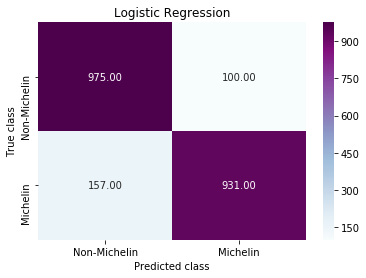

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

logreg1_y_pred = logreg1.predict(X_test)
logreg1_cm = metrics.confusion_matrix(y_test, logreg1_y_pred)
sns.heatmap(logreg1_cm, annot = True, fmt='.2f', cmap = "BuPu", xticklabels = ["Non-Michelin", "Michelin"] , yticklabels = ["Non-Michelin", "Michelin"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')


In [49]:
c_m_analysis(logreg1_cm, y_test, logreg1_y_pred)

Precision:			0.90 identified as Michelin are Michelin
Recall/TPR:			0.86 proportion of Michelin identified
False Positive Rate:		0.09 proportion of Non-Michelin identified as Michelin
f-score:			0.88 tradeoff between precision and recall
Accuracy:			0.88 how well the model has classified


## Random Forest

In [50]:
cols = ['rating', 'review_count', 'delivery', 'pickup', 'reservation',
        'vader_positive', 'vader_negative', 'compound', 'neutral', 'vader_pos_neg',
        'NRC_positive', 'NRC_surprise', 'NRC_anticipation', 'NRC_sadness','NRC_negative', 
        'NRC_trust', 'NRC_anger', 'NRC_joy', 'NRC_disgust', 'NRC_fear', 'NRC_pos_neg',
        'New York', 'Chicago', 'Washington', 'San Francisco', 'French', 'American (Traditional)', 
        'Korean', 'Italian', 'Thai', 'American (New)', 'Chinese', 'Japanese', 'Mediterranean', 
        'Spanish', 'Mexican', 'Indian', 'British','Seafood', 'Wine Bars', 'Steakhouses', 
        'Dim Sum', 'price1', 'price2', 'price3', 'price4']
X = df_ml[cols]
y = df_ml['Michelin']

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rf = SelectFromModel(RandomForestClassifier(n_estimators = 100))
rf.fit(X_train, y_train)


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [52]:
rf.get_support()
selected_feat= X_train.columns[(rf.get_support())]
selected_feat

Index(['review_count', 'vader_positive', 'vader_negative', 'compound',
       'neutral', 'vader_pos_neg', 'NRC_positive', 'NRC_surprise',
       'NRC_anticipation', 'NRC_sadness', 'NRC_negative', 'NRC_trust',
       'NRC_anger', 'NRC_joy', 'NRC_disgust', 'NRC_fear', 'NRC_pos_neg',
       'price2', 'price4'],
      dtype='object')

In [53]:
cols = ['review_count', 'vader_positive', 'compound', 'neutral',
       'vader_pos_neg', 'NRC_positive', 'NRC_surprise', 'NRC_anticipation',
       'NRC_sadness', 'NRC_negative', 'NRC_trust', 'NRC_anger', 'NRC_joy',
       'NRC_disgust', 'NRC_fear', 'NRC_pos_neg', 'price2', 'price4']
X = df_ml[cols]
y = df_ml['Michelin']

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
feature_labels = np.array(['review_count', 'vader_positive', 'compound', 'neutral',
       'vader_pos_neg', 'NRC_positive', 'NRC_surprise', 'NRC_anticipation',
       'NRC_sadness', 'NRC_negative', 'NRC_trust', 'NRC_anger', 'NRC_joy',
       'NRC_disgust', 'NRC_fear', 'NRC_pos_neg', 'price2', 'price4'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{} - {:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))
    
    

NRC_disgust - 2.31%
compound - 2.52%
review_count - 2.58%
NRC_anticipation - 2.90%
NRC_pos_neg - 2.95%
price2 - 3.09%
NRC_joy - 3.21%
vader_pos_neg - 3.28%
NRC_trust - 3.28%
NRC_negative - 4.33%
NRC_positive - 4.36%
NRC_surprise - 4.39%
NRC_sadness - 4.59%
vader_positive - 4.65%
NRC_anger - 4.97%
NRC_fear - 5.55%
neutral - 6.18%
price4 - 34.86%


In [56]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.967


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1079
           1       0.91      0.45      0.60        64

   micro avg       0.97      0.97      0.97      1143
   macro avg       0.94      0.73      0.79      1143
weighted avg       0.97      0.97      0.96      1143



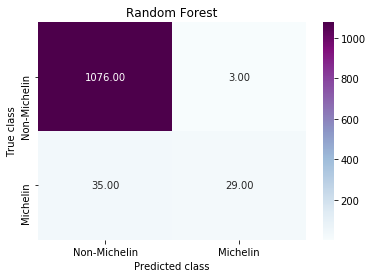

In [58]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(forest_cm, annot=True, cmap = "BuPu", fmt='.2f',xticklabels = ["Non-Michelin", "Michelin"] , yticklabels = ["Non-Michelin", "Michelin"] )
import matplotlib.pyplot as plt
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [59]:
c_m_analysis(forest_cm, y_test,logreg_y_pred)

Precision:			0.91 identified as Michelin are Michelin
Recall/TPR:			0.45 proportion of Michelin identified
False Positive Rate:		0.00 proportion of Non-Michelin identified as Michelin
f-score:			0.60 tradeoff between precision and recall
Accuracy:			0.97 how well the model has classified


# OLS Linear Regression

In [60]:
import statsmodels.api as sm

X = df[['rating', 'review_count', 'delivery', 'pickup', 'reservation',
            'vader_positive', 'vader_negative', 'compound', 'neutral', 'vader_pos_neg', 
            'NRC_positive', 'NRC_surprise', 'NRC_anticipation', 'NRC_sadness','NRC_negative', 'NRC_trust', 
            'NRC_anger', 'NRC_joy', 'NRC_disgust', 'NRC_fear', 'NRC_pos_neg',
            'New York', 'Chicago', 'Washington', 'San Francisco', 'French', 'American (Traditional)', 
            'Korean', 'Italian', 'Thai', 'American (New)', 'Chinese', 'Japanese', 'Mediterranean', 
            'Spanish', 'Mexican', 'Indian', 'British','Seafood', 'Wine Bars', 'Steakhouses', 
            'Dim Sum', 'price1', 'price2', 'price3', 'price4']]  ## independent variables

y = df['Michelin']  ## Dependent variable
X = sm.add_constant(X)  ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Michelin   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     138.5
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        14:43:33   Log-Likelihood:                 1503.2
No. Observations:                3809   AIC:                            -2954.
Df Residuals:                    3783   BIC:                            -2792.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.0448      1.215     -1.684      0.092      -4.426       0.336
rating                    -0.0084      0.010     -0.835      0.404      -0.028       0.011
review_count           -4.392e-06   3.69e-06     -1.191      0.234   -1.16e-05    2.84e-06
delivery                   0.0041      0.010      0.428      0.669      -0.015       0.023
pickup                    -0.0171      0.009     -1.805      0.071      -0.036       0.001
reservation               -0.0240      0.010     -2.456      0.014      -0.043      -0.005
vader_positive             2.1972      1.839      1.195      0.232      -1.408       5.802
vader_negative             3.2356      1.851      1.748      0.081      -0.394       6.865
compound                   0.9538      0.177      5.381      0.000       0.606       1.301
neutral                    3.3048      1.823      1.813      0.070      -0.268       6.878
vader_pos_neg             -1.0385      0.225     -4.618      0.000      -1.479      -0.598
NRC_positive               2.1150      0.834      2.536      0.011       0.480       3.750
NRC_surprise               3.7890      1.988      1.906      0.057      -0.109       7.687
NRC_anticipation          -1.7675      1.272     -1.390      0.165      -4.261       0.726
NRC_sadness                2.5317      2.516      1.006      0.314      -2.401       7.464
NRC_negative               1.6206      1.128      1.437      0.151      -0.591       3.832
NRC_trust                 -1.5807      1.331     -1.188      0.235      -4.190       1.029
NRC_anger                 -5.5250      1.997     -2.767      0.006      -9.439      -1.611
NRC_joy                    0.8130      1.633      0.498      0.619      -2.389       4.015
NRC_disgust                1.1754      3.090      0.380      0.704      -4.883       7.233
NRC_fear                   0.9819      1.168      0.841      0.401      -1.308       3.271
NRC_pos_neg                0.4944      0.673      0.734      0.463      -0.825       1.814
New York                  -0.4858      0.304     -1.598      0.110      -1.082       0.110
Chicago                   -0.5211      0.304     -1.716      0.086      -1.116       0.074
Washington                -0.5387      0.304     -1.773      0.076      -1.134       0.057
San Francisco             -0.4992      0.303     -1.646      0.100      -1.094       0.095
French                          0          0        nan        nan           0           0
American (Traditional)          0          0        nan        nan           0           0
Korean                          0          0        nan        nan           0           0
Italian                         0          0        nan        nan           0           0
Thai                            0          0        nan        nan           0  

In [61]:
# rating, compound，vader_pos_neg, sims_score, Mi_nomi_score_scale

In [62]:
import statsmodels.api as sm

X = df[['pickup', 'vader_negative', 'compound', 'neutral', 'vader_pos_neg', 
        'NRC_positive', 'NRC_anger', 'New York', 'Chicago', 'Washington', 
        'San Francisco','price1', 'price2', 'price3', 'price4']]  ## independent variables

y = df['Michelin']  ## Dependent variable
X = sm.add_constant(X)  ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Michelin   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     264.3
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        14:43:37   Log-Likelihood:                 1493.6
No. Observations:                3809   AIC:                            -2959.
Df Residuals:                    3795   BIC:                            -2872.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.1275      1.213     -1.753      0.080      -4.507       0.252
pickup            -0.0161      0.006     -2.827      0.005      -0.027      -0.005
vader_negative     6.0155      3.673      1.638      0.102      -1.186      13.217
compound           0.9401      0.171      5.496      0.000       0.605       1.275
neutral            3.3933      1.821      1.863      0.063      -0.177       6.964
vader_pos_neg      1.2435      1.852      0.672      0.502      -2.387       4.874
NRC_positive       2.5417      0.629      4.039      0.000       1.308       3.775
NRC_anger         -3.3312      1.718     -1.939      0.053      -6.700       0.038
New York          -0.5094      0.304     -1.677      0.094      -1.105       0.086
Chicago           -0.5402      0.303     -1.781      0.075      -1.135       0.055
Washington        -0.5584      0.304     -1.839      0.066      -1.154       0.037
San Francisco     -0.5194      0.303     -1.715      0.086      -1.113       0.075
price1            -0.7260      0.303     -2.393      0.017      -1.321      -0.131
price2            -0.7217      0.303     -2.378      0.017      -1.317      -0.127
price3            -0.6204      0.304     -2.044      0.041      -1.215      -0.025
price4            -0.0596      0.304     -0.196      0.844      -0.655       0.536
==============================================================================
Omnibus:                     2198.656   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57277.847
Skew:                           2.251   Prob(JB):                         0.00
Kurtosis:                      21.456   Cond. No.                     2.64e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.48e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [63]:
import statsmodels.api as sm

X = df[['pickup', 'vader_negative', 'compound', 'neutral', 
        'NRC_positive', 'New York', 'Chicago', 'Washington', 
        'San Francisco','price1', 'price2', 'price3']]  ## independent variables

y = df['Michelin']  ## Dependent variable
X = sm.add_constant(X)  ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Michelin   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     311.8
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        14:43:38   Log-Likelihood:                 1491.5
No. Observations:                3809   AIC:                            -2959.
Df Residuals:                    3797   BIC:                            -2884.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.2150      0.217     -5.602      0.000      -1.640      -0.790
pickup            -0.0153      0.006     -2.706      0.007      -0.026      -0.004
vader_negative     3.4027      0.615      5.532      0.000       2.197       4.609
compound           0.9677      0.168      5.744      0.000       0.637       1.298
neutral            2.1831      0.265      8.238      0.000       1.664       2.703
NRC_positive       2.5213      0.629      4.006      0.000       1.287       3.755
New York          -0.2815      0.055     -5.120      0.000      -0.389      -0.174
Chicago           -0.3122      0.054     -5.784      0.000      -0.418      -0.206
Washington        -0.3295      0.055     -6.045      0.000      -0.436      -0.223
San Francisco     -0.2918      0.054     -5.378      0.000      -0.398      -0.185
price1            -0.6711      0.015    -45.413      0.000      -0.700      -0.642
price2            -0.6642      0.013    -49.285      0.000      -0.691      -0.638
price3            -0.5609      0.015    -37.651      0.000      -0.590      -0.532
==============================================================================
Omnibus:                     2199.978   Durbin-Watson:                   1.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57483.186
Skew:                           2.252   Prob(JB):                         0.00
Kurtosis:                      21.491   Cond. No.                     3.33e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.25e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
import statsmodels.api as sm

X = df[['pickup', 'vader_negative', 'compound', 'neutral', 
        'NRC_positive']]  ## independent variables

y = df['Michelin']  ## Dependent variable
X = sm.add_constant(X)  ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Michelin   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     102.0
Date:                Thu, 02 May 2019   Prob (F-statistic):          3.25e-101
Time:                        14:43:39   Log-Likelihood:                 505.39
No. Observations:                3809   AIC:                            -998.8
Df Residuals:                    3803   BIC:                            -961.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.9666      0.325    -18.336      0.000      -6.605      -5.329
pickup            -0.0543      0.007     -7.728      0.000      -0.068      -0.041
vader_negative     9.1291      0.769     11.879      0.000       7.622      10.636
compound           3.0158      0.204     14.797      0.000       2.616       3.415
neutral            5.9650      0.323     18.488      0.000       5.332       6.598
NRC_positive       5.3017      0.798      6.642      0.000       3.737       6.867
==============================================================================
Omnibus:                     2551.542   Durbin-Watson:                   0.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23984.367
Skew:                           3.250   Prob(JB):                         0.00
Kurtosis:                      13.434   Cond. No.                         359.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
df.columns.values

array(['name', 'city', 'latitude', 'longitude', 'price_level', 'rating',
       'review_count', 'delivery', 'pickup', 'reservation', 'alias',
       'categories', 'coordinates', 'display_phone', 'distance', 'id',
       'image_url', 'is_closed', 'location', 'phone', 'price',
       'transactions', 'url', 'reviews', 'vader', 'vader_positive',
       'vader_negative', 'compound', 'neutral', 'vader_pos_neg', 'NRC',
       'NRC_positive', 'NRC_surprise', 'NRC_anticipation', 'NRC_sadness',
       'NRC_negative', 'NRC_trust', 'NRC_anger', 'NRC_joy', 'NRC_disgust',
       'NRC_fear', 'NRC_pos_neg', 'category', 'French',
       'American (Traditional)', 'Korean', 'Italian', 'Thai',
       'American (New)', 'Chinese', 'Japanese', 'Mediterranean',
       'Spanish', 'Mexican', 'Indian', 'British', 'Seafood', 'Wine Bars',
       'Steakhouses', 'Dim Sum', 'City', 'New York', 'Chicago',
       'Washington', 'San Francisco', 'Michelin', 'price1', 'price2',
       'price3', 'price4'], dtype=object)

In [66]:
df_sentiment = df[['vader', 'vader_positive', 'vader_negative', 'compound', 'neutral', 'vader_pos_neg', 'NRC',
                   'NRC_positive', 'NRC_surprise', 'NRC_anticipation', 'NRC_sadness',
                   'NRC_negative', 'NRC_trust', 'NRC_anger', 'NRC_joy', 'NRC_disgust','NRC_fear', 'NRC_pos_neg']]
df_sentiment.describe()


,vader_positive,vader_negative,compound,neutral,vader_pos_neg,NRC_positive,NRC_surprise,NRC_anticipation,NRC_sadness,NRC_negative,NRC_trust,NRC_anger,NRC_joy,NRC_disgust,NRC_fear,NRC_pos_neg
count,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000
mean,0.187320,0.035184,0.283194,0.777050,0.152135,0.044280,0.009080,0.020223,0.005512,0.013219,0.026434,0.004880,0.026175,0.003817,0.005682,0.031061
std,0.025842,0.010009,0.052417,0.022971,0.031764,0.005461,0.001758,0.002841,0.001402,0.002391,0.003878,0.001739,0.004146,0.001126,0.002548,0.006164
min,0.000000,0.000000,-0.023651,0.671452,-0.022374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.172086,0.028645,0.253527,0.764828,0.133494,0.041203,0.008071,0.018613,0.004677,0.011770,0.024107,0.003843,0.023689,0.003104,0.004167,0.027376
50%,0.187259,0.033965,0.286775,0.777256,0.152435,0.044156,0.008958,0.020084,0.005393,0.013041,0.026225,0.004569,0.026101,0.003700,0.005118,0.031041
75%,0.202229,0.040452,0.317545,0.789174,0.172299,0.047297,0.009919,0.021654,0.006237,0.014463,0.028470,0.005488,0.028620,0.004417,0.006502,0.034712
max,0.294143,0.098651,0.484241,1.000000,0.279634,0.075611,0.027116,0.040674,0.016447,0.027417,0.050831,0.022875,0.047347,0.012021,0.029909,0.065378


In [67]:
for i in ['vader', 'vader_positive', 'vader_negative', 'compound', 'neutral', 'vader_pos_neg', 'NRC',
                   'NRC_positive', 'NRC_surprise', 'NRC_anticipation', 'NRC_sadness',
                   'NRC_negative', 'NRC_trust', 'NRC_anger', 'NRC_joy', 'NRC_disgust','NRC_fear', 'NRC_pos_neg']:
    df[i] = df[i] * 100

In [68]:
import statsmodels.api as sm

X = df[['pickup', 'vader_negative', 'compound', 'neutral', 
        'NRC_positive']]  ## independent variables

y = df['Michelin']  ## Dependent variable
X = sm.add_constant(X)  ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Michelin   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     102.0
Date:                Thu, 02 May 2019   Prob (F-statistic):          3.25e-101
Time:                        14:43:42   Log-Likelihood:                 505.39
No. Observations:                3809   AIC:                            -998.8
Df Residuals:                    3803   BIC:                            -961.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.9666      0.325    -18.336      0.000      -6.605      -5.329
pickup            -0.0543      0.007     -7.728      0.000      -0.068      -0.041
vader_negative     0.0913      0.008     11.879      0.000       0.076       0.106
compound           0.0302      0.002     14.797      0.000       0.026       0.034
neutral            0.0597      0.003     18.488      0.000       0.053       0.066
NRC_positive       0.0530      0.008      6.642      0.000       0.037       0.069
==============================================================================
Omnibus:                     2551.542   Durbin-Watson:                   0.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23984.367
Skew:                           3.250   Prob(JB):                         0.00
Kurtosis:                      13.434   Cond. No.                     7.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Regression Classification

In [69]:
cols = ['rating', 'review_count', 'delivery', 'pickup', 'reservation',
        'vader_positive', 'vader_negative', 'compound', 'neutral', 'vader_pos_neg',
        'NRC_positive', 'NRC_surprise', 'NRC_anticipation', 'NRC_sadness','NRC_negative', 
        'NRC_trust', 'NRC_anger', 'NRC_joy', 'NRC_disgust', 'NRC_fear', 'NRC_pos_neg',
        'New York', 'Chicago', 'Washington', 'San Francisco', 'French', 'American (Traditional)', 
        'Korean', 'Italian', 'Thai', 'American (New)', 'Chinese', 'Japanese', 'Mediterranean', 
        'Spanish', 'Mexican', 'Indian', 'British','Seafood', 'Wine Bars', 'Steakhouses', 
        'Dim Sum', 'price1', 'price2', 'price3', 'price4']
X = df_ml[cols]
y = df_ml['Michelin']

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
testing_predictions  = model.predict(X_test)
testing_predictions

array([-0.03184542,  0.15651872,  0.00773755, ..., -0.02364983,
        0.01388375,  0.72059976])

In [71]:
def get_classification(predictions,threshold):
    classes = np.zeros_like(testing_predictions)
    for i in range(len(classes)):
        if predictions[i] > threshold:
            classes[i] = 1
    return classes

get_classification(testing_predictions,0.55)

array([0., 0., 0., ..., 0., 0., 1.])

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,get_classification(testing_predictions,0.55))

array([[1067,   12],
       [  25,   39]], dtype=int64)

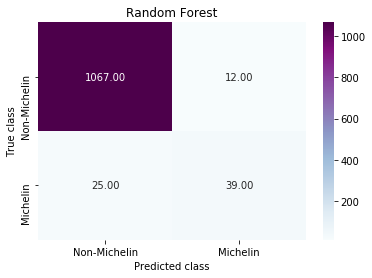

In [73]:
import seaborn as sns
model_cm = confusion_matrix(y_test,get_classification(testing_predictions,0.55))
sns.heatmap(model_cm, annot=True, cmap = "BuPu", fmt='.2f',xticklabels = ["Non-Michelin", "Michelin"] , yticklabels = ["Non-Michelin", "Michelin"] )
import matplotlib.pyplot as plt
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')
plt.show()

In [74]:
def c_m_analysis(matrix,true,pred):
    tn, fp, fn, tp = matrix.ravel()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f_score = 2*precision*recall/(precision+recall)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print("Precision:\t\t\t%1.2f identified as Michelin are Michelin"%(precision))
    print("Recall/TPR:\t\t\t%1.2f proportion of Michelin identified"%(recall))
    print("False Positive Rate:\t\t%1.2f proportion of Non-Michelin identified as Michelin"%fpr)
    print("f-score:\t\t\t%1.2f tradeoff between precision and recall"%(f_score))
    print("Accuracy:\t\t\t%1.2f how well the model has classified"%(accuracy))


c_m_analysis(model_cm, y_test,get_classification(testing_predictions,0.55))

Precision:			0.76 identified as Michelin are Michelin
Recall/TPR:			0.61 proportion of Michelin identified
False Positive Rate:		0.01 proportion of Non-Michelin identified as Michelin
f-score:			0.68 tradeoff between precision and recall
Accuracy:			0.97 how well the model has classified
